Generic imports

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

The board we're using is 8x8 with 64 squares. But this solution works for every board

In [ ]:
BOARD = 8
SQUARES = BOARD ** 2

We'll look at the board as a long 1-dimentional vector with 64 items instead of a 8x8 2D array.

So we need some help functions:


*   board2vec - converts NxN board to an N^2 vector
*   vec2board - converts N^2 vector to an NxN board
*   coin2pos - Converts from a position in the 1D vec [0..(N^2-1)] to a position on the board [(0..[N-1]) , (0..[N-1])]
*   showboard - plots the current board


In [ ]:
def board2vec(board):
  return board.reshape([BOARD ** 2])

def vec2board(vec):
  return vec.reshape([BOARD,BOARD])

def showboard(board):
  _ = plt.imshow(board,cmap='Greys')
  plt.gca().invert_yaxis()
  plt.show()

def coin2pos(coin_id):
  xcoin = coin_id % 8
  ycoin = coin_id // 8
  return xcoin, ycoin

Generate a random board. This board is our starting position.

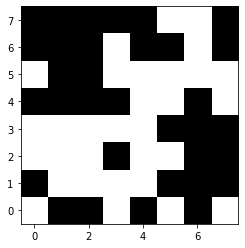

In [ ]:
board = np.random.randint(0, 2, size=[BOARD,BOARD])
showboard(board)

The first player, Alice, can only flip one coin. Therefor we need a "flip coin" function. 
This function, "flip" takes in the original board and flips a single coin by index. 

In [ ]:
def flip(arr, pos, special_val=None):
    mask = arr.copy()
    if special_val is None:
      mask[pos] = 1 - mask[pos]
    else:
      mask[pos] = special_val
    return mask

This is the heart of the solution.
Bob, the second player cannot touch the board, he can only look. Therefor we need a function that converts a board state to an index of a coin.



*   Function input: N^2 binary vector
*   Function output: an integer in range [0..63] which represent the devil's favorite coin



Any board can be converted into 64 different boards using a single flip. 
We need to make sure that each of them represent a different number - without repetitions. 

An example of such function is Hamming's code correction. 
We need to get N values [n1..nN]


---


*   n1 = vec[0] xor vec[2] xor vec[4] ...      (we take one, we skip one)
*   n2 = vec[1] xor vec[2] xor vec[5],xor vec[6]  ...      (we take 2, we skip 2)
*   ....
*   nN = (we take N, we skip N)

We get a binary array, when we convert it back into an int we get a number between 0.. (N-1). 

For deeper dive google "Hamming Error Correction" 
---

Each board state can be converted to 64 unique new board, each one is assosiated using this function to a different number in range [0..63].

In [ ]:
# Convert an int into a binary array which represent that number
# MSB first
def _int2arr(num):
    bytes = int(np.ceil(SQUARES / 8.0))
    num_arr = np.arange(num, num + 1, dtype='>i%d' % bytes)
    res = np.unpackbits(num_arr.view(np.uint8))[-1 * SQUARES:]
    res_flipped = res[::-1]
    return res_flipped

# Convert a binary array which represent a number to an int
def _arr2int(arr):
    return arr.dot(1 << np.arange(arr.size)[::-1])

# Take a chess board and return the number in which the devil's coin is placed
def arr2coin(arr):
    err_bits = int(np.floor(np.log2(arr.shape[0])))
    res_arr = np.zeros(err_bits, dtype=int)
    for idx in range(err_bits):
        idxes_to_check = [t for t in range(SQUARES) if _int2arr(t)[idx] == 1]
        for t_idx in idxes_to_check:
            res_arr[idx] ^= arr[t_idx]

    return _arr2int(res_arr)

Now for the actual game. 
Alice enters the room. 

She flips Each coin and checks the "value" of the new candidate board. 


1.   Flip a coin
2.   Check value of board using arr2coin
3.   If the value matches the devil's coin - stop
4.   If it does not, revert back to original board, and try the next coin.

The right value is guranteed to be there since there are only 64 options and no result can repeat.



In [ ]:
# Original board as 1D vector
arr = board2vec(board)

devils_coin_to_coin_to_flip = dict()
for coin_to_flip in range(SQUARES):
    flipped_arr = flip(arr, coin_to_flip)
    calc_results = arr2coin(flipped_arr)
    devils_coin_to_coin_to_flip[calc_results] = coin_to_flip


already_used = list()
for possible_coin in range(SQUARES):
    coin_to_flip = devils_coin_to_coin_to_flip.get(possible_coin, '<< MISSING >> ')
    print(f"If the devil chose coin {possible_coin} you should flip coin {coin_to_flip}")

If the devil chose coin 0 you should flip coin 40
If the devil chose coin 1 you should flip coin 8
If the devil chose coin 2 you should flip coin 56
If the devil chose coin 3 you should flip coin 24
If the devil chose coin 4 you should flip coin 32
If the devil chose coin 5 you should flip coin 0
If the devil chose coin 6 you should flip coin 48
If the devil chose coin 7 you should flip coin 16
If the devil chose coin 8 you should flip coin 44
If the devil chose coin 9 you should flip coin 12
If the devil chose coin 10 you should flip coin 60
If the devil chose coin 11 you should flip coin 28
If the devil chose coin 12 you should flip coin 36
If the devil chose coin 13 you should flip coin 4
If the devil chose coin 14 you should flip coin 52
If the devil chose coin 15 you should flip coin 20
If the devil chose coin 16 you should flip coin 42
If the devil chose coin 17 you should flip coin 10
If the devil chose coin 18 you should flip coin 58
If the devil chose coin 19 you should flip c

The devil is selecting a coin. 
Alice flips the matching coin from the board.

In [ ]:
devils_coin = np.random.choice(range(SQUARES))
print(f"If the devil chose coin {devils_coin}")
coin_to_flip = devils_coin_to_coin_to_flip[devils_coin]
print(f"Coin to flip: {coin_to_flip} [{coin2pos(coin_to_flip)}]")

new_board_colored = vec2board(flip(arr, coin_to_flip,special_val=2))
flipped_arr = flip(arr, coin_to_flip)
new_board = vec2board(flipped_arr)

If the devil chose coin 18
Coin to flip: 58 [(2, 7)]


Alice can now leave the room. 
When bob enters he just needs to convert the board to a value using the pre-determined function arr2coin alice used as well to know the Devil's coin.

Original board (Current devil's coin: 5)


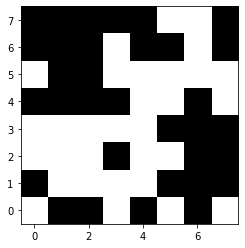

Coin to flip


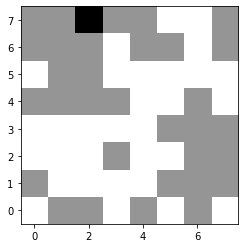

New board  (Current devil's coin: 18)


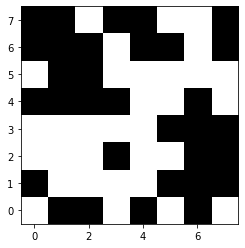

In [ ]:
print(f"Original board (Current devil's coin: {arr2coin(arr)})")
showboard(board)
print("Coin to flip")
showboard(new_board_colored)
print(f"New board  (Current devil's coin: {arr2coin(flipped_arr)})")
showboard(new_board)